## Robert Swain's jury

In [1]:
from numpy import count_nonzero, arange, zeros, array, mean, append, repeat
from numpy.random import randint, shuffle
from scipy.stats import ttest_ind as ttest, chi2_contingency as chi2, binom
from pandas import crosstab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
randint(1, 5)

4

In [3]:
a = randint(1, 5)
a

1

In [4]:
a == 1

True

In [5]:
jurors = randint(1, 5, 12)
jurors

array([1, 1, 1, 1, 2, 3, 3, 4, 3, 2, 4, 3])

In [6]:
jurors == 1

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False])

In [7]:
count_nonzero(jurors == 1)

4

In [8]:
jurors = randint(1, 5, 12)
result = count_nonzero(jurors == 1)
result

2

In [9]:
results = zeros(10000)
for i in arange(10000):
    jurors = randint(1, 5, 12)
    result = count_nonzero(jurors == 1)
    results[i] = result

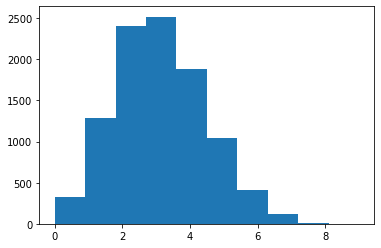

In [10]:
plt.hist(results);

In [11]:
n_zeros = count_nonzero(results == 0)
n_zeros

320

In [12]:
p_zeros = n_zeros / 10000
p_zeros

0.032

The agonizing way:

In [13]:
binom(12, 0.25).cdf(0)

0.03167635202407837

## Mosquitoes

See <https://github.com/matthew-brett/datasets/tree/master/mosquito_beer>.

In [14]:
beer = array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
              17, 36, 31, 30, 22, 20, 29, 23])
beer

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23])

In [15]:
water = array([33, 23, 23, 13, 24,  8,  4, 21, 24, 21, 26, 27, 22, 21, 25, 20,  7,
        3])

In [16]:
mean(beer)

23.6

In [17]:
mean(water)

19.166666666666668

In [18]:
actual_diff = mean(beer) - mean(water)
actual_diff

4.433333333333334

In [19]:
bucket = append(beer, water)
bucket

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23, 33, 23, 23, 13, 24,  8,  4, 21, 24,
       21, 26, 27, 22, 21, 25, 20,  7,  3])

In [20]:
mean(bucket[:25])

23.6

In [21]:
mean(bucket[25:])

19.166666666666668

In [22]:
shuffle(bucket)
bucket

array([24, 25, 22, 27, 17, 21, 23, 23, 27, 30, 37, 23, 25, 36, 14,  8, 22,
       29, 26,  4, 21, 31,  7, 27, 23, 27, 33, 22, 24, 21, 27, 12, 20, 33,
       25, 20, 26,  7,  3, 11, 36, 13,  3])

In [23]:
mean(bucket[:25])

22.88

In [24]:
mean(bucket[25:])

20.166666666666668

In [25]:
fake_diff = mean(bucket[:25]) - mean(bucket[25:])
fake_diff

2.713333333333331

In [26]:
shuffle(bucket)
fake_diff = mean(bucket[:25]) - mean(bucket[25:])
fake_diff

2.522222222222222

In [27]:
results = zeros(10000)
for i in arange(10000):
    shuffle(bucket)
    fake_diff = mean(bucket[:25]) - mean(bucket[25:])
    results[i] = fake_diff

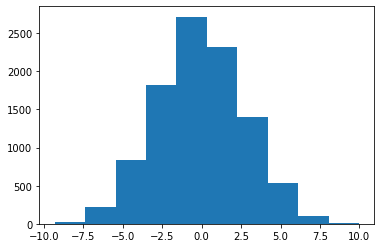

In [28]:
plt.hist(results);

In [29]:
n_gte_actual = count_nonzero(results >= actual_diff)
n_gte_actual

573

In [30]:
p_gte_actual = n_gte_actual / 10000
p_gte_actual

0.0573

The agonizing and less accurate way:

In [31]:
ttest(beer, water)

Ttest_indResult(statistic=1.6402506050018828, pvalue=0.10860416177339083)

## Rescuers and democracy

See: <https://github.com/matthew-brett/datasets/tree/master/oliner1988>.

In [32]:
rescue_or_not = repeat(['Rescuer', 'Bystander'], [40, 7])
democratic_or_other = repeat(['Democratic', 'Other', 'Democratic', 'Other'], [32, 8, 1, 6])
table = crosstab(rescue_or_not, democratic_or_other)
table

col_0,Democratic,Other
row_0,,
Bystander,1,6
Rescuer,32,8


In [33]:
actual_count = table.loc['Bystander', 'Democratic']
actual_count

1

In [34]:
shuffle(rescue_or_not)
shuffle(democratic_or_other)
fake_table = crosstab(rescue_or_not, democratic_or_other)
fake_table

col_0,Democratic,Other
row_0,,
Bystander,4,3
Rescuer,29,11


In [35]:
fake_count = fake_table.loc['Bystander', 'Democratic']
fake_count

4

In [36]:
results = zeros(1000)
for i in arange(1000):
    shuffle(rescue_or_not)
    shuffle(democratic_or_other)
    fake_table = crosstab(rescue_or_not, democratic_or_other)
    fake_count = fake_table.loc['Bystander', 'Democratic']
    results[i] = fake_count

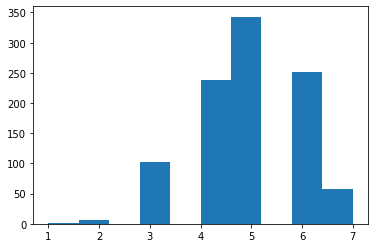

In [37]:
plt.hist(results);

In [38]:
n_lte_actual = count_nonzero(results <= actual_count)
n_lte_actual

1

In [39]:
p_lte_actual = n_lte_actual / 1000
p_lte_actual

0.001

The agonizing way:

In [40]:
c2, p_value, df, expected = chi2(table)
p_value

0.0022184497551642765